# CARS MPG ASSESSMENT - UNSUPERVISED LEARNING

Brief Introduction

1. For the Cars MPG Dataset there are two files - one is a json file with charecterists of the cars and there is another file with the name of the cars. We will be using the json file for analysis.
2. First step, would be to load the dataset
3. There are two other files also 
a) Car Name - We will not be using the file in this exercise for now (can't see a use for it unless I have to use the index to map the values to which car it is - for now in this exercise don't see a use of it)
b) Company - This file, I am not able to make any sense of this file. The rows / columns are all different. This seems like a seperate exercise.

*** PLEASE DO NOTE THE PDF which WAS ATTACHED in this EXERCISE was calling to do two studies, THE TEXT / BRIEF DESCRIPTION only required this CARS MPG to be DONE... hence working on that only in this exercise. PLEASE CLARIFY, if my understanding is incorrect here. ***

In [601]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [602]:
data = pd.read_json('Car-Attributes.json')

# Preliminary Analysis - Data Sanity Check

1. We will cover elements like size, shape of the data
2. Try to understand the dataset better interms of the number of elements, features etc.
3. Then we will try to see there are no missing values in the dataset and treat those if required

In [603]:
data.shape #398 rows and 8 columns

(398, 8)

In [604]:
data.dtypes 
#There is one column 'hp' which is an object, indication that it might have missing values OR non numerical data

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [605]:
data[pd.to_numeric(data['hp'], errors='coerce').isnull()]
# As we can see there are '?' chareceters in the 'HP' column which might be causing it to be listed as an object
# We will impute all these values and replace them with the mode of HP

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [606]:
data['hp']=data['hp'].replace('?',np.nan).astype(float) # to remove data values with '?'
data['hp']=data['hp'].fillna(data['hp'].mode()) #replace them with mode

In [607]:
# Now lets re-check if the column has become an float / int VS an Object
data.dtypes 

# Great it has become a float now
# Now lets retrieve information about the dataset

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [608]:
data.info() 
# Details about the datatypes; Infact the above two statements of shape & dtypes can be replaced by info only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      392 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [609]:
# There is a possibility that still within these features there could be some values which are blank
# Now doing a for loop to check for these

for col in data.columns:
    print ("# of ", col, " is null =", data[col].isnull().sum())

# of  mpg  is null = 0
# of  cyl  is null = 0
# of  disp  is null = 0
# of  hp  is null = 6
# of  wt  is null = 0
# of  acc  is null = 0
# of  yr  is null = 0
# of  origin  is null = 0


In [610]:
# As we can see from above there are 6 rows where the value of HP is Blank
# We would have to treat these as well before we go on
# Since this dataset is only 399 rows I am not dropping these rows but I am imputing these with mode for HP

data.loc[data['hp'].isnull() == True, 'hp'] = data['hp'].mode()[0] # This will impute blanks with mode

In [611]:
# Rechecking for blanks again
for col in data.columns:
    print ("# of ", col, " is null =", data[col].isnull().sum())
    
# Okay as you can see there are no blanks left now

# of  mpg  is null = 0
# of  cyl  is null = 0
# of  disp  is null = 0
# of  hp  is null = 0
# of  wt  is null = 0
# of  acc  is null = 0
# of  yr  is null = 0
# of  origin  is null = 0


# Exploratory Data Analysis (EDA)

In [612]:
# Let's bring up describe to understand the variation of our data
data.describe() 

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


What we can see for now is:

1. Cylinder, Origin these both seem to have the least standard deviation out the entire set
2. The values for these two i.e. Difference between max-min is the least
3. Quiet possible these two are categorical variables, but we would have to plot the graphs to ascertain

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64


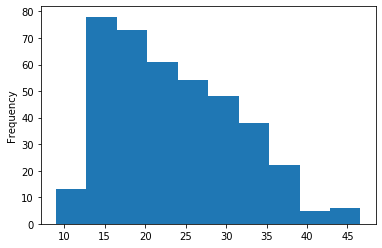

In [613]:
# 1. Per the Domain Understanding MPG might stand for Miles Per Gallon

print(data['mpg'].value_counts())
data['mpg'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Continous variable
# 2.Right Skew

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64


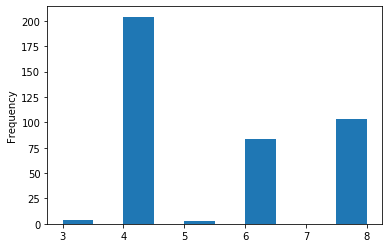

In [614]:
# 2. Per the Domain Understanding CYL might stand for Number of Cylinders in a Car

print(data['cyl'].value_counts())
data['cyl'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Categorical Variable with limited options i.e. a car is only 3,4,5,6 and 8 Cylinders
# 2.Majority of the cars are with 4 Cylinders, next highest bucket being those with 8 Cylinders
# 3. There are very few cars with 3 or 5 cylinders

97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
         ..
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: disp, Length: 82, dtype: int64


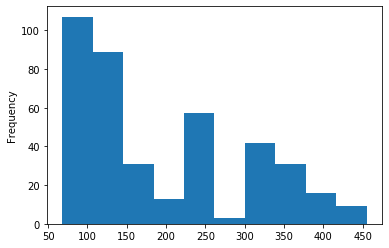

In [615]:
# 3. Per the Domain Understanding DISP might stand for Dispersion of the Vehicle

print(data['disp'].value_counts())
data['disp'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Continous Variable
# 2.Two seperate curves in the distribution
# 3.Primarily right skewed data

150.0    28
90.0     20
88.0     19
110.0    18
100.0    17
         ..
94.0      1
167.0     1
158.0     1
137.0     1
107.0     1
Name: hp, Length: 93, dtype: int64


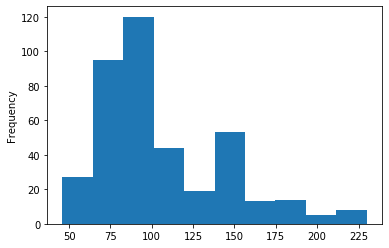

In [616]:
# 4. Per the Domain Understanding HP might stand for Horse Power of the Vehicle

print(data['hp'].value_counts())
data['hp'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Continous Variable
# 2.Slightly skewed to the right

1985    4
2130    4
2155    3
2300    3
2720    3
       ..
1980    1
2865    1
3892    1
2020    1
4096    1
Name: wt, Length: 351, dtype: int64


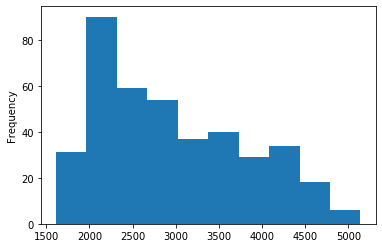

In [617]:
# 5. Per the Domain Understanding WT might stand for Weight of the Vehicle

print(data['wt'].value_counts())
data['wt'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Continous Variable
# 2.Slightly skewed to the right indicating majority vehicles are around 2000 pounds (assumed pounds& not kg)

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acc, Length: 95, dtype: int64


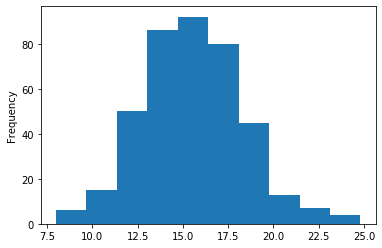

In [618]:
# 6. Per the Domain Understanding ACC might stand for Acceleration of the Vehicle

print(data['acc'].value_counts())
data['acc'].plot.hist()

# What we can conclude from below is that this is a 
# 1.Continous Variable
# 2.This one is not skewed ever so right

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: yr, dtype: int64


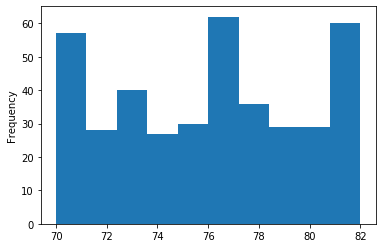

In [619]:
# 7. Per the Domain Understanding YR might stand for YEAR of the Vehicle

print(data['yr'].value_counts().sort_index())
data['yr'].plot.hist()

# What we can conclude from below is that this is a 
# 1.This is also a categorical variable with 12 years of data (Sorted using sort_index)
# 2. Primarily we can see vehicles have three key years from the distribution below 

1    249
3     79
2     70
Name: origin, dtype: int64


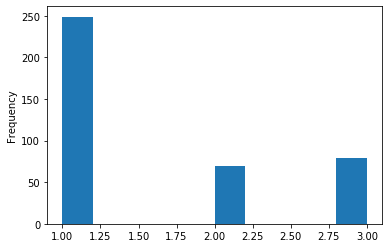

In [620]:
# 8. Per the Domain Understanding Origin might stand for Origin of the Vehicle; there appears 
# to be a country / region which is encoded hence we will have to with the labels only

print(data['origin'].value_counts())
data['origin'].plot.hist()

# What we can conclude from below is that this is a 
# 1.This is also a categorical variable with 3 points only

For the Variables above this is which ones are categorical vs continous
1. Categorical (3 Total) - CYL (cylinder), YR (year) and ORIGIN (origin of the vehicle)
2. Continous (5 Total) - MPG, DISP, HP, WT, ACC

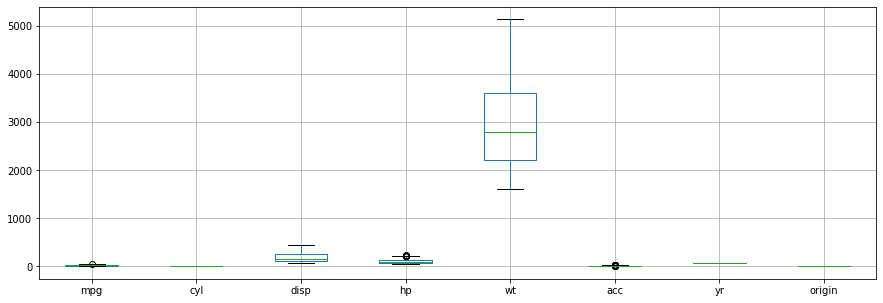

In [621]:
# Next onto plotting the box plot to see the variation in the data
data.boxplot(figsize=(15,5))
        
# If we see the boxplot is not showing any dispersion in the data using the statement above, it is because
# weight messes it up


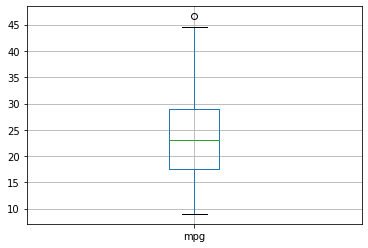

In [622]:
# Plotting the boxplots individually:    
data.boxplot('mpg')

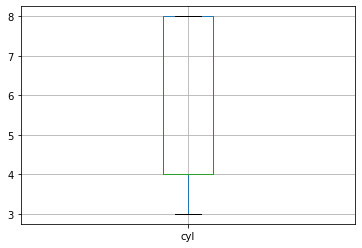

In [623]:
# Plotting the boxplots individually:    
data.boxplot('cyl')

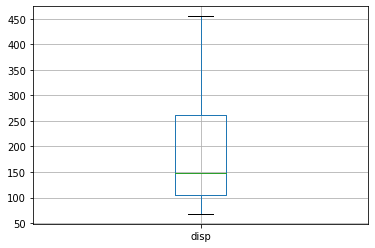

In [624]:
# Plotting the boxplots individually:    
data.boxplot('disp')

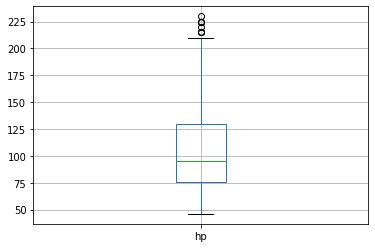

In [625]:
# Plotting the boxplots individually:    
data.boxplot('hp')

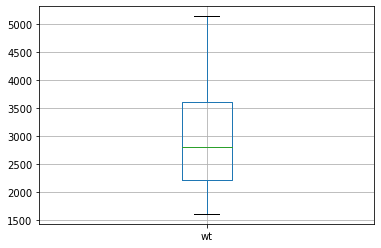

In [626]:
# Plotting the boxplots individually:    
data.boxplot('wt')

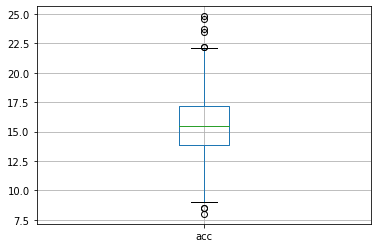

In [627]:
# Plotting the boxplots individually:    
data.boxplot('acc')

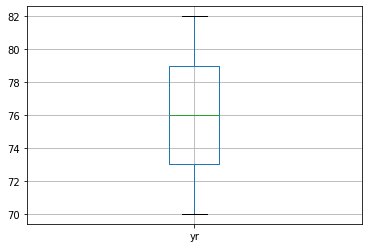

In [628]:
# Plotting the boxplots individually:    
data.boxplot('yr')

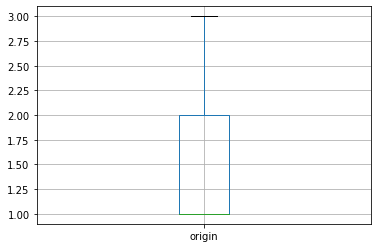

In [629]:
# Plotting the boxplots individually:    
data.boxplot('origin')

In this boxplot above - we can see three variables have outliers

1. MP
2. HP
3. ACC

Lets do some more analysis below before we treat these outliers

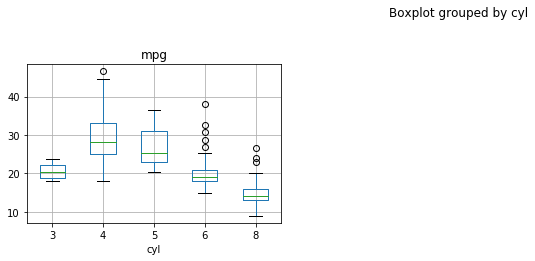

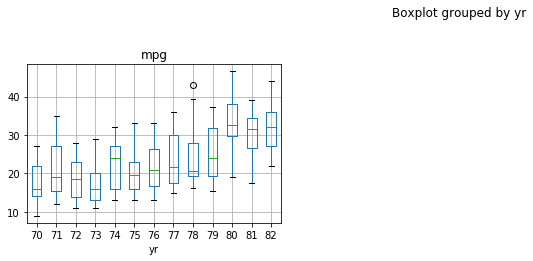

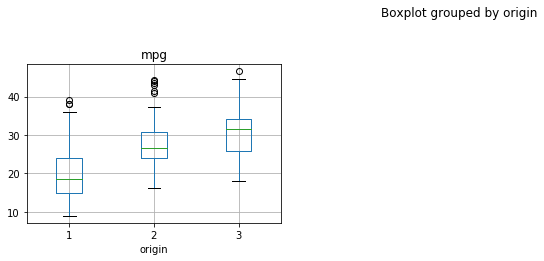

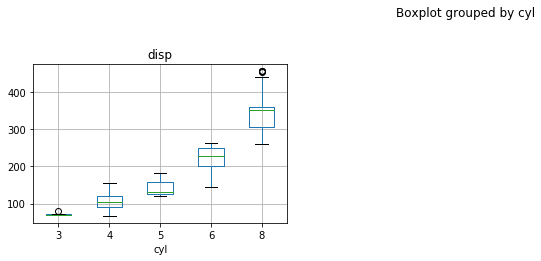

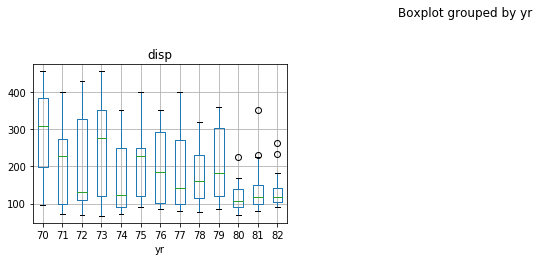

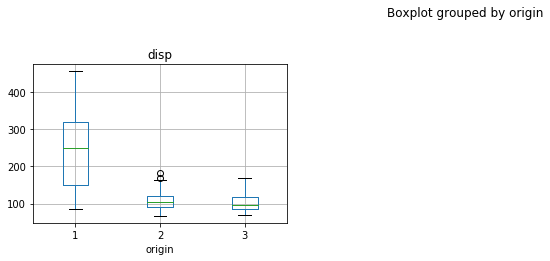

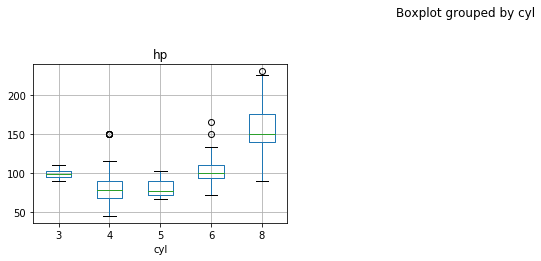

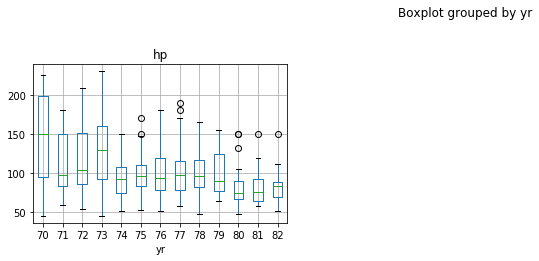

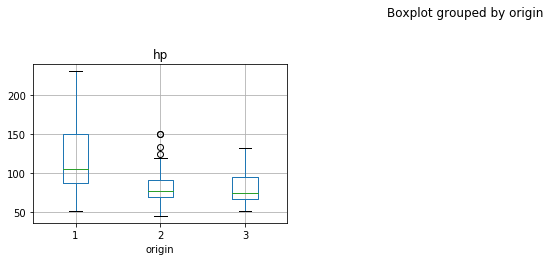

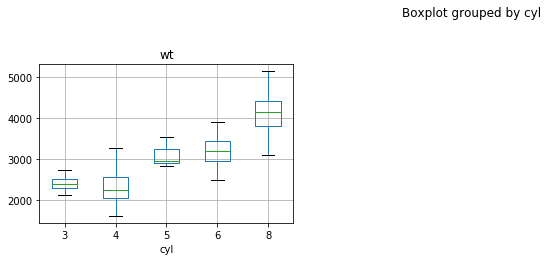

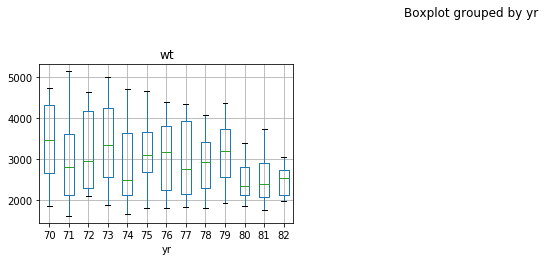

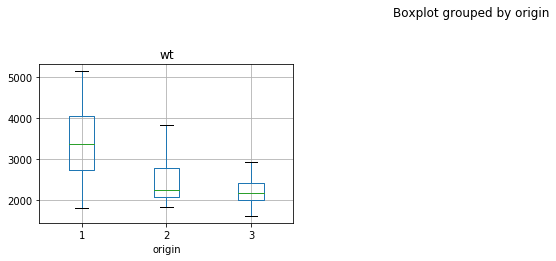

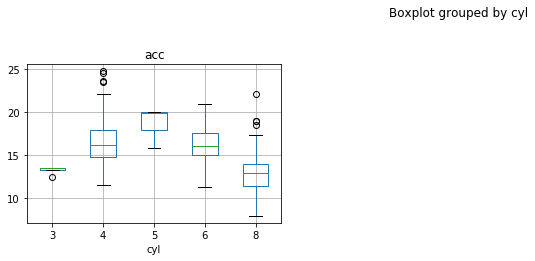

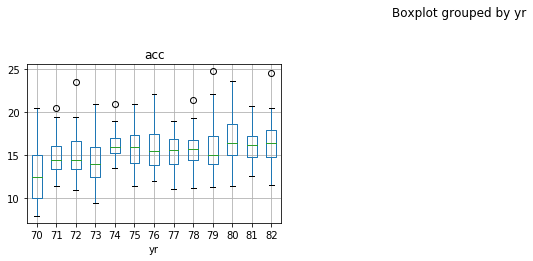

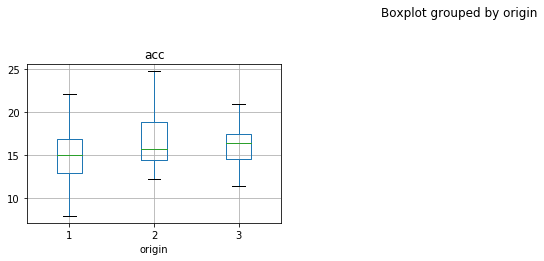

In [630]:
# Next onto plotting the box plot category and continous variable wise to understand the data better
category = ['cyl','yr','origin']
continous =  ['mpg','disp','hp','wt','acc']

for x in continous:
    for y in category:
        data.boxplot(column=x,by=y, figsize=(15,10), layout=(3,3)) #<- Plot the continous variables by categorical 
        
# Using the function we will not only be able to view the boxplot for all the features but will also be able to study
# that using the category dispersions

# BOXPLOT ANALYSIS (UNDERSTANDING of the DATA DISPERSION)

1. MPG:

    a) There are outliers in this data (prob vehicles which are really efficient
    
    b) Miles fall as the number of cylinders are increased in a vehicle 
    
    c) Over the years miles per gallon have increased for vehicle indicating the push towards higher efficiency
    
    d) Region 3 vehicles are a slightly bit more fuel efficient (I don't know if this is manufacture or run; manufacture I doubt if it can be so different. Run yes possible e.g. Central US vs Bay Areas where traffic is higher).


2. DSP:
    
    a) There are no outliers in the data

    b) The higher the cylinder the higher the dispersion

    c) Year has no baring on dispersion

    d) There is a large variation in vehicles in Origin 1, while 2 and 3 region vehicles are almost the same

3 HP:

    a) The HP feature has outliers which will have to be treated

    b) The higher the cylinder the higher the horsepower

    c) What is interesting to see is that for a 3 cylinder vehicle also the horse power is higher than the vehicles with 5 cylinder (prob there is a low sample set)

    d) Year has no baring on horse power
    
    e) Origin also shows the same thing as dispersion as both are interconnect - region 1 shows higher variation VS the other two regions


4) WT:

    a) The higher the number of cylinders the higher the variation

    b) Years across is the same

    c) Variation keeps on decreasing as we go from Origin 1 to 2 and then to 3

5) ACC:
    
    a) ACC has outliers that need to be treated

    b) What is interesting is to see that a 8 cylinder car has a lower variation and lower overall acceleration than a 4 cylinder or a 5 cylinder vehicle.

    c) Year and Origin is the same across

# After a solid understanding of the data, now onto treating the outliers

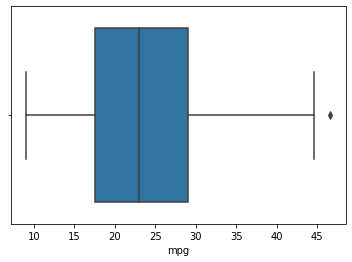

In [631]:
sns.boxplot(data['mpg'])

# It is visible to the naked eye that the outlier is >45

In [632]:
data[data['mpg'] > 45]
# Since there is only one row item I had the option to drop it
# considering this dataset is only 399 items, hence I am not doing that

,mpg,cyl,disp,hp,wt,acc,yr,origin
322,46.6,4,86.0,65.0,2110,17.9,80,3


In [633]:
# Imputing this value with the mode of the MPG column
data.loc[data['mpg'] > 45, 'mpg'] = data['mpg'].mode()[0] # This will impute value of > 45 with mode

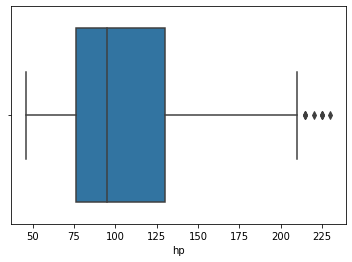

In [634]:
sns.boxplot(data['hp'])

# It is visible to the naked eye that the outlier is >210 we can also confirm the same using the value_counts below

In [635]:
data['hp'].value_counts().sort_index()

46.0     2
48.0     3
49.0     1
52.0     4
53.0     2
        ..
210.0    1
215.0    3
220.0    1
225.0    3
230.0    1
Name: hp, Length: 93, dtype: int64

In [636]:
data[data['hp'] > 210]
# We are getting 8 rows imputing the value of mode of the column

,mpg,cyl,disp,hp,wt,acc,yr,origin
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
13,14.0,8,455.0,225.0,3086,10.0,70,1
25,10.0,8,360.0,215.0,4615,14.0,70,1
94,13.0,8,440.0,215.0,4735,11.0,73,1
95,12.0,8,455.0,225.0,4951,11.0,73,1
116,16.0,8,400.0,230.0,4278,9.5,73,1


In [637]:
# Imputing this value with the mode of the HP column
data.loc[data['hp'] > 210, 'hp'] = data['hp'].mode()[0] # This will impute value of > 210 with mode

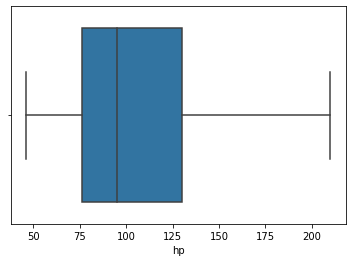

In [638]:
# Plotting the boxplot for HP again to confirm that the outliers have been treated

sns.boxplot(data['hp'])

# Perfect no outliers now.

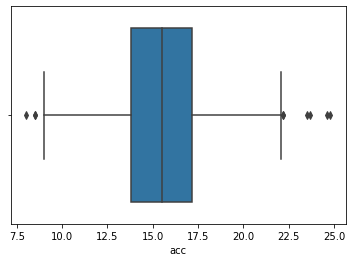

In [639]:
sns.boxplot(data['acc'])

# There are outliers on the two fronts here, less and more than the IQR
# Let's find out the IQR to identify the boundaries above and below which the outliers need to be treated

In [640]:
# Calculating IQR Values

Q1 = data['acc'].quantile(0.25)
Q3 = data['acc'].quantile(0.75)

IQR = Q3 - Q1

LowerValue = Q1 - (IQR*1.5)
UpperValue = Q3 + (IQR*1.5)

print(f'Upper Quartile Level is {round(UpperValue,2)}')
print(f'Lower Quartile Level is {round(LowerValue,2)}')

Upper Quartile Level is 22.2
Lower Quartile Level is 8.8


In [641]:
# Now First treating values less than 8.8
data[data['acc'] < 8.8]
# We are getting 3 rows imputing the value of mode of the column

,mpg,cyl,disp,hp,wt,acc,yr,origin
7,14.0,8,440.0,150.0,4312,8.5,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1
11,14.0,8,340.0,160.0,3609,8.0,70,1


In [642]:
# Imputing this value with the mode of the ACC column
data.loc[data['acc'] < 8.8, 'acc'] = data['acc'].mode()[0] # This will impute value of < 8.8 with mode

In [643]:
# Now treating values above than 22.2
data[data['acc'] > 22.2]
# We are getting 4 rows imputing the value of mode of the column

,mpg,cyl,disp,hp,wt,acc,yr,origin
59,23.0,4,97.0,54.0,2254,23.5,72,2
299,27.2,4,141.0,71.0,3190,24.8,79,2
326,43.4,4,90.0,48.0,2335,23.7,80,2
394,44.0,4,97.0,52.0,2130,24.6,82,2


In [644]:
# Imputing this value with the mode of the ACC column
data.loc[data['acc'] > 22.2, 'acc'] = data['acc'].mode()[0] # This will impute value of > 22.2 with mode

# Now after treating the Data for Outliers lets look at the pair plot and the correlation analysis

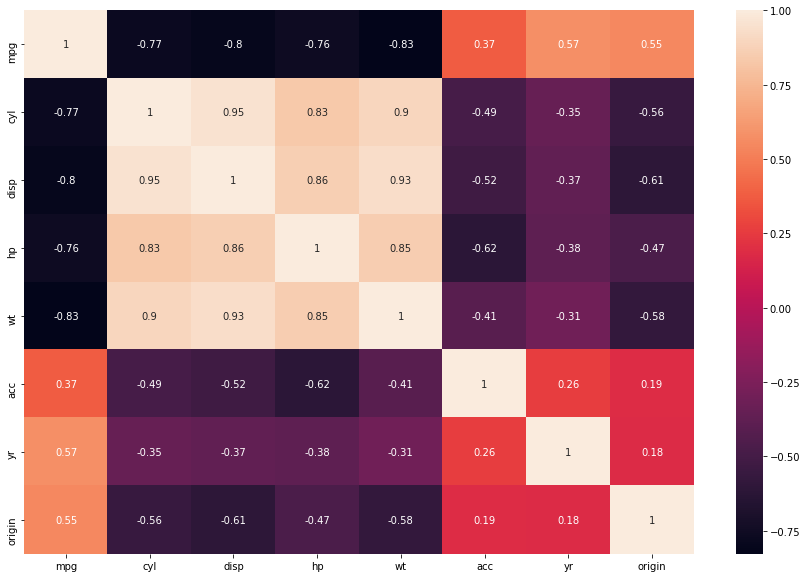

In [645]:
corr = data.corr(method='pearson')
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

# There is a very high correlation (both negative and positive) between a number of features e.g.
1. The weight (wt) of the car miles per gallon (mpg) is inversely correlated which if you think makes sense. The heavier the vehicle the lesser the miles per gallon efficiency it will give.
2. The number of cylinders (cyl) and weigh (wt) has a positive correlation - logical again
3. Similary the dispersion and cylinders also has a positive correlation
4. For a dataset like this it should be relatively easy to get a good model

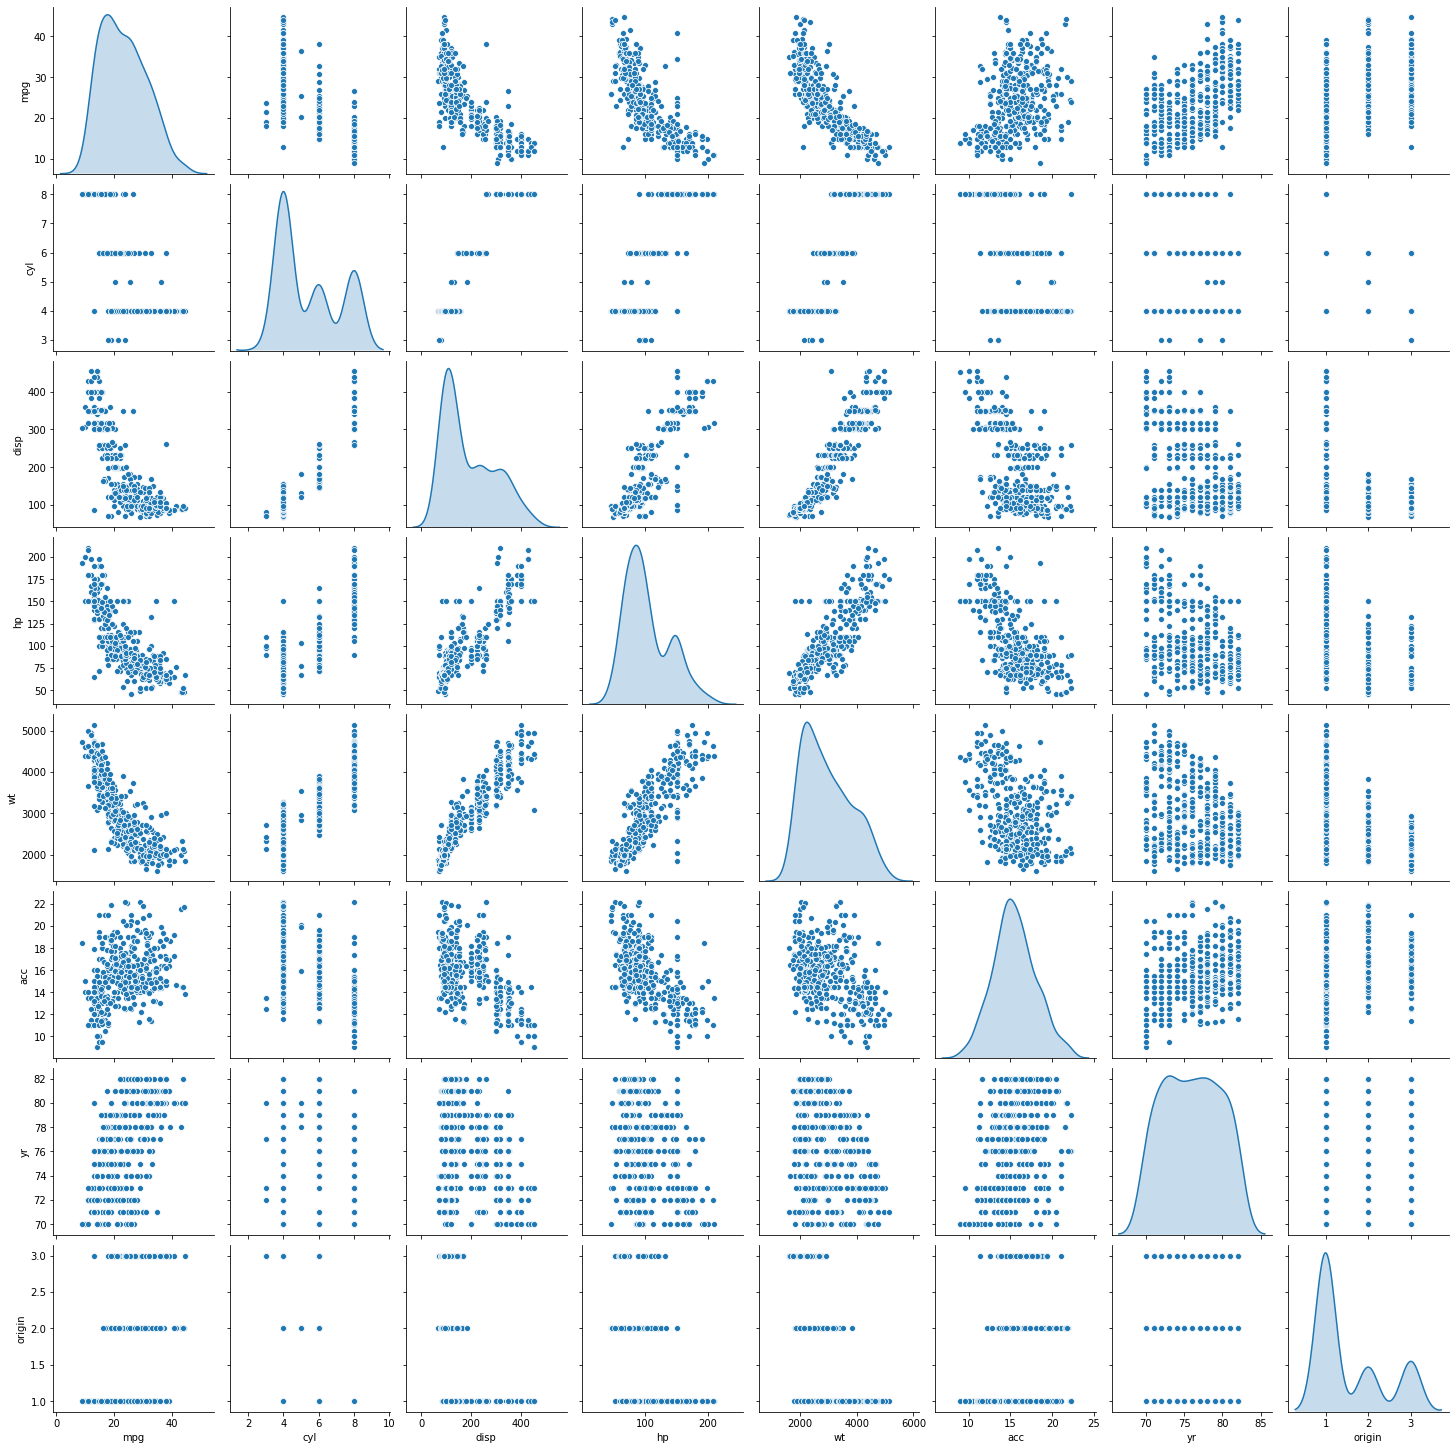

In [646]:
sns.pairplot(data,diag_kind='kde')

# Analysis from the Pairplot above, it is visible that:
1. There is a beautiful correlation between a number of variables e.g. for dispersion and mpg the scatter plot shows a negative sloping line hence a negative correlation.. which is also visible from the correlation table above i.e. -80%
2. Features like weight and dispersion have a positive correlation which is visible from the upward sloping line and also from can correlation table above i.e. 93%

# CLUSTERING the DATA now...

In [647]:
# Using KMeans and Hierchical Clustering to find optimal number of clusters in the data.

In [648]:
#from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import cdist


In [649]:
# Applying the Z-Score to Normalize the Data
zdata = data.apply(zscore)
zdata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.701803,1.498191,1.090604,0.742272,0.630870,-1.383445,-1.627426,-0.715145
1,-1.089529,1.498191,1.503514,1.730975,0.854333,-1.580091,-1.627426,-0.715145
2,-0.701803,1.498191,1.196232,1.307245,0.550470,-1.776738,-1.627426,-0.715145
3,-0.960287,1.498191,1.061796,1.307245,0.546923,-1.383445,-1.627426,-0.715145
4,-0.831045,1.498191,1.042591,1.024759,0.565841,-1.973385,-1.627426,-0.715145


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

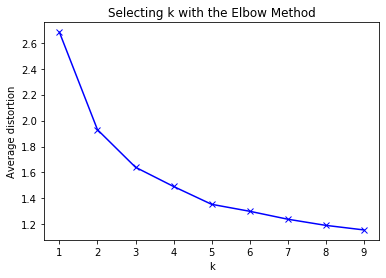

In [650]:
#kMeans Model
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(zdata)
    prediction=model.predict(zdata)
    meanDistortions.append(sum(np.min(cdist(zdata, model.cluster_centers_, 'euclidean'), axis=1)) / zdata.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [651]:
#using silhouette score: Higher the value, better the cluster.
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [2, 3, 4, 5]

clusterScore =[]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 43)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 43)
    clusterScore.append((score, K))
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.6347362563906254)
For n_clusters = 3, silhouette score is 0.5859108350181881)
For n_clusters = 4, silhouette score is 0.5792832543109426)
For n_clusters = 5, silhouette score is 0.5460763297608962)


1. Now this is so interesting to note that as per the silhouette's score not even 3 but the correct number for the cluster to use is the number 2

# Hierchical Clustering to Re-Affirm the Above:


In [652]:
from sklearn.cluster import AgglomerativeClustering 

In [653]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [654]:
model.fit(zdata)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6)

In [655]:
data['Hierchicallabel'] = model.labels_
hdata = data.groupby(["Hierchicallabel"]).count()
data.groupby(["Hierchicallabel"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Hierchicallabel,,,,,,,,
0,215,215,215,215,215,215,215,215
1,100,100,100,100,100,100,100,100
2,1,1,1,1,1,1,1,1
3,80,80,80,80,80,80,80,80
4,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1


In [656]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [657]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data, 'complete') # complete gives the best score out of all
c, coph_dists = cophenet(Z , pdist(data))

c

0.7833372341024188

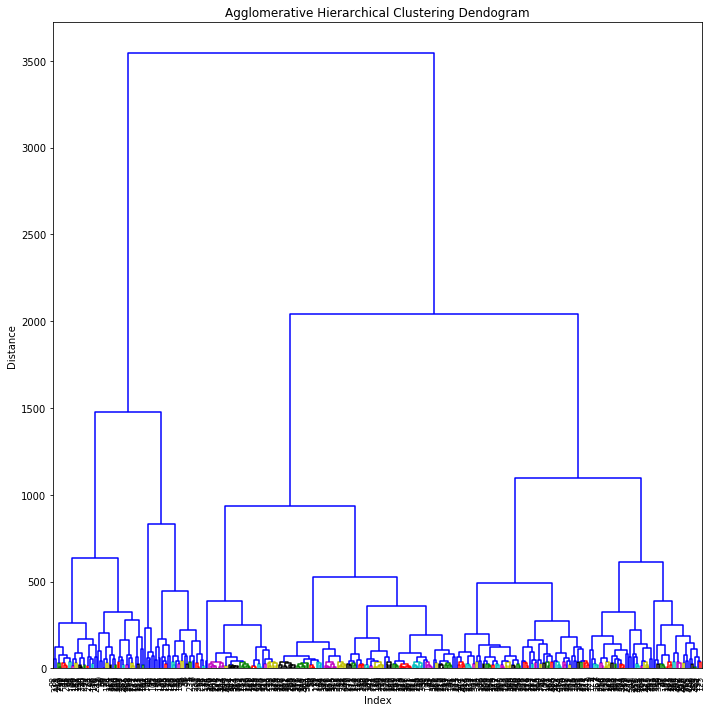

In [658]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

# Analysis of Clustering:

1. Initially when we used the K-Means method we saw the elbow getting formed at the level of 2 or 3
2. However the silhoutte's score suggested the correct number of clusters to use were 2
3. Next when we did the Hierchical Clustering and looked at the Dendogram we can go with 3, 2 is very broad
4. The straight line in the Denodogram would cut this into 3 clusters somewhere around the 2000 level.
5. In the dendogram when we see 4 clusters it woudl get the two clusters around 1500 level very close to each other

In this model let's understand the data using both if we divide these clusters into 2 and 3 and lets see how the data looks to decide which is the best value to take.

In [659]:
# EDA with KMEANS 2 Clusters:

final_model=KMeans(2)
final_model.fit(zdata)
prediction=final_model.predict(zdata)
centroids2 = kmeans.cluster_centers_

#Append the prediction 
data["kmeans2"] = prediction
print("Assigned : \n")
data.head()

Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0


In [660]:
# EDA with KMEANS 3 Clusters:

final_model=KMeans(3)
final_model.fit(zdata)
prediction=final_model.predict(zdata)
centroids3 = kmeans.cluster_centers_

#Append the prediction 
data["kmeans3"] = prediction
print("Assigned : \n")
data.head()

Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,1


In [661]:
# 1. The number of observations in each cluster are
# For a cluster of 2
data['kmeans2'].value_counts()

1    229
0    169
Name: kmeans2, dtype: int64

In [662]:
# For a cluster of 3
data['kmeans3'].value_counts()

2    162
0    136
1    100
Name: kmeans3, dtype: int64

# Since the split above seems to show no variations, now let's plot the data and see. Starting with a cluster split of 2

In [663]:
# Lets do a data variation analysis between the two clusters to see how they have been split

data[data.kmeans2==0].describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0,169.000000
mean,16.440237,7.218935,299.485207,133.047337,3785.698225,14.463314,74.366864,1.017751,1.798817,0.0,0.591716
std,3.148853,0.978639,69.412424,31.324494,578.287474,2.579720,3.036734,0.132439,0.991511,0.0,0.492977
min,9.000000,6.000000,155.000000,72.000000,2472.000000,9.000000,70.000000,1.000000,0.000000,0.0,0.000000
25%,14.000000,6.000000,232.000000,105.000000,3365.000000,12.500000,72.000000,1.000000,1.000000,0.0,0.000000
50%,16.000000,8.000000,304.000000,140.000000,3755.000000,14.500000,74.000000,1.000000,1.000000,0.0,1.000000
75%,18.500000,8.000000,350.000000,150.000000,4237.000000,16.000000,77.000000,1.000000,3.000000,0.0,1.000000
max,26.600000,8.000000,455.000000,210.000000,5140.000000,22.200000,82.000000,2.000000,3.000000,0.0,1.000000


In [664]:
# Lets do a data variation analysis between the two clusters to see how they have been split

data[data.kmeans2==1].describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000
mean,28.588646,4.152838,115.155022,82.082969,2368.759825,16.295633,77.222707,1.982533,0.205240,1.0,1.414847
std,5.852998,0.568357,29.830350,18.888573,382.142447,2.224816,3.678793,0.842745,0.792934,0.0,0.911884
min,13.000000,3.000000,68.000000,46.000000,1613.000000,11.300000,70.000000,1.000000,0.000000,1.0,0.000000
25%,24.000000,4.000000,97.000000,69.000000,2074.000000,14.500000,74.000000,1.000000,0.000000,1.0,0.000000
50%,28.000000,4.000000,108.000000,80.000000,2288.000000,16.000000,78.000000,2.000000,0.000000,1.0,2.000000
75%,32.400000,4.000000,135.000000,90.000000,2660.000000,17.700000,80.000000,3.000000,0.000000,1.0,2.000000
max,44.600000,6.000000,262.000000,150.000000,3530.000000,22.200000,82.000000,3.000000,5.000000,1.0,2.000000


In [665]:
for x in category: # was defined earlier
    print(pd.crosstab(data[x],data['kmeans2']))

kmeans2    0    1
cyl              
3          0    4
4          0  204
5          0    3
6         66   18
8        103    0
kmeans2   0   1
yr             
70       22   7
71       15  13
72       13  15
73       27  13
74       12  15
75       18  12
76       17  17
77       12  16
78       15  21
79       13  16
80        1  28
81        3  26
82        1  30
kmeans2    0   1
origin          
1        166  83
2          3  67
3          0  79


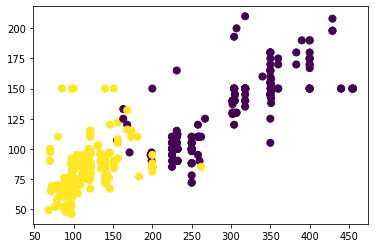

In [666]:
# Now lets plot some continous variables to see how that data was split.. this is for a collerated data set.
plt.scatter(data['disp'], data['hp'], c= data['kmeans2'], s=50, alpha=1)
plt.show()

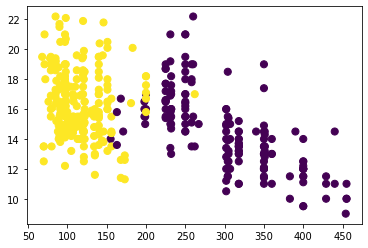

In [667]:
# Now lets plot some continous variables to see how that data was split.. this is fo not such a correlated data set.
plt.scatter(data['disp'], data['acc'], c= data['kmeans2'], s=50, alpha=1)
plt.show()

# Now as you can see when we split the data using 2 Clusters; 
1. It did a beautfily split basis cylinders almost like a black and white
2. For the year value, lower years are a part of cluster 0 and higher a part of cluster 1
3. For the origin one the split is not that clear. There is a spill over to cluster 1 for origin 1
4. When we plotted the scatter values all values were split with a set of values which were spilling over, we plotted for dispersion, horsepower and acceleration.

In [668]:
# Lets do a data variation analysis between the two clusters to see how they have been split

data[data.kmeans3==0].describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0
mean,21.693382,5.250000,188.047794,96.536765,2991.198529,16.788971,76.323529,1.080882,1.661765,0.492647,0.0
std,4.037146,1.080123,53.362141,15.651249,446.126221,2.020586,3.529521,0.273662,1.496765,0.501794,0.0
min,15.000000,4.000000,91.000000,60.000000,1955.000000,11.300000,70.000000,1.000000,0.000000,0.000000,0.0
25%,18.500000,4.000000,140.000000,86.000000,2664.500000,15.500000,73.750000,1.000000,0.000000,0.000000,0.0
50%,21.000000,6.000000,198.500000,95.000000,2963.500000,16.500000,76.000000,1.000000,3.000000,0.000000,0.0
75%,25.000000,6.000000,232.000000,105.000000,3340.250000,18.125000,79.000000,1.000000,3.000000,1.000000,0.0
max,38.000000,8.000000,350.000000,150.000000,4060.000000,22.200000,82.000000,2.000000,4.000000,1.000000,0.0


In [669]:
# Lets do a data variation analysis between the two clusters to see how they have been split

data[data.kmeans3==1].describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.0,100.0
mean,14.715000,7.98,346.370000,154.850000,4126.910000,12.906000,73.750000,1.0,1.02,0.0,1.0
std,2.416416,0.20,46.524384,19.559479,447.011357,1.689828,2.917641,0.0,0.20,0.0,0.0
min,9.000000,6.00,231.000000,110.000000,3086.000000,9.000000,70.000000,1.0,1.00,0.0,1.0
25%,13.000000,8.00,306.500000,145.000000,3827.750000,11.875000,71.750000,1.0,1.00,0.0,1.0
50%,14.000000,8.00,350.000000,150.000000,4147.500000,13.000000,73.000000,1.0,1.00,0.0,1.0
75%,16.000000,8.00,365.750000,165.500000,4422.750000,14.000000,76.000000,1.0,1.00,0.0,1.0
max,23.000000,8.00,455.000000,210.000000,5140.000000,18.500000,79.000000,1.0,3.00,0.0,1.0


In [670]:
# Lets do a data variation analysis between the two clusters to see how they have been split

data[data.kmeans3==2].describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Hierchicallabel,kmeans2,kmeans3
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,162.0
mean,30.267901,4.067901,103.530864,78.197531,2239.104938,16.062346,77.141975,2.339506,0.141975,1.0,2.0
std,5.828338,0.447582,20.138703,18.286824,330.699120,2.214072,3.672742,0.723720,0.685858,0.0,0.0
min,13.000000,3.000000,68.000000,46.000000,1613.000000,11.400000,70.000000,1.000000,0.000000,1.0,2.0
25%,26.000000,4.000000,90.000000,67.000000,1991.250000,14.500000,74.000000,2.000000,0.000000,1.0,2.0
50%,30.500000,4.000000,98.000000,75.000000,2165.500000,15.500000,78.000000,2.000000,0.000000,1.0,2.0
75%,34.100000,4.000000,116.000000,90.000000,2394.000000,17.475000,80.000000,3.000000,0.000000,1.0,2.0
max,44.600000,6.000000,168.000000,150.000000,3250.000000,22.200000,82.000000,3.000000,5.000000,1.0,2.0


In [671]:
for x in category: # was defined earlier
    print(pd.crosstab(data[x],data['kmeans3']))

kmeans3   0   1    2
cyl                 
3         0   0    4
4        54   0  150
5         2   0    1
6        76   1    7
8         4  99    0
kmeans3   0   1   2
yr                 
70        4  18   7
71       13   7   8
72        7  13   8
73       10  20  10
74        9   5  13
75       14   6  10
76       15   9  10
77        8   7  13
78       17   6  13
79       11   9   9
80        6   0  23
81        8   0  21
82       14   0  17
kmeans3    0    1   2
origin               
1        125  100  24
2         11    0  59
3          0    0  79


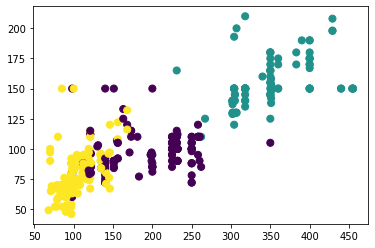

In [672]:
# Now lets plot some continous variables to see how that data was split.. this is for a collerated data set.
plt.scatter(data['disp'], data['hp'], c= data['kmeans3'], s=50, alpha=1)
plt.show()

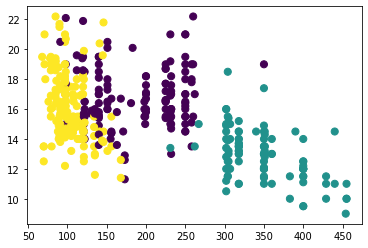

In [673]:
# Now lets plot some continous variables to see how that data was split.. this is for a collerated data set.
plt.scatter(data['disp'], data['acc'], c= data['kmeans3'], s=50, alpha=1)
plt.show()

# Now as you can see when we split the data using 3 Clusters; 
1. The splits are not that clear when we split it using 3 clusters
2. Even the scatter plots show not such a clear split

# FINALLY using Visual Analysis, Silhoutte's Score and Common Sense it woudl make a lot of logical sense to split teh data into 2 clusters only. Hence the correct value of k would be 2.. i.e. k=2

# Now Creating a Linear Regression Model

1. Creating two seperate linear regressions models for both the clusters
2. The reason why we use two seperate models is because we have ascertained that the data distribution for both is different
3. It would make a lot of sense to have regression models which are seperate for both the distributions

*** PLEASE NOTE for a LINEAR MODEL.. we WOULD need a continoous output variable to be predicted, since we did not have that called out, I used MPG as the predicted variable. Otherwise, in my humble understanding this would have been a logistic regression problem if wanted to predict the cluster in which a certain set of parameters should fall. Have implemented that too. ***

In [674]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, plot_confusion_matrix, confusion_matrix, mean_squared_error
from sklearn.model_selection import  train_test_split


In [675]:
# Plotting without any classification

selectedData = data

# split the dataset into X and Y
Y = selectedData[['mpg']]

# Dropping all categorical data, classification data as well as the predicted variable
X = selectedData.drop(['mpg','cyl','origin','yr','kmeans2','kmeans3','Hierchicallabel'], axis=1) 

# no do feature scaling and see the results
ScaledX = X.apply(zscore)

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(ScaledX, Y, test_size=0.20, random_state=43)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Training score: {}\n'.format(model.score(X_train,y_train)))
print('Testing score: {}\n'.format(model.score(X_test,y_test)))
print('Accuracy: {}\n'.format(r2_score(y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
print(f'Regressor Coefficients are: {model.coef_}')
print(f'Regressor Intercepts is: {model.intercept_}')

Training set has 318 samples.
Testing set has 80 samples.
Training score: 0.699125049524679

Testing score: 0.7057357891432905

Accuracy: 0.7057357891432905

MSE: 17.608416800824642
Regressor Coefficients are: [[-0.77217906 -1.74823113 -4.35028741 -0.39294888]]
Regressor Intercepts is: [23.34947719]


In [676]:
# Linear Regression for each of the 2 clusters

for each in range(0,2):
    selectedData = data[data['kmeans2'] == each]
    
    print('=============================================')
    print(f'========Running For Cluster # {each}===========')
    
    # split the dataset into X and Y
    Y = selectedData[['mpg']]
    
    # Dropping all categorical data, classification data as well as the predicted variable
    X = selectedData.drop(['mpg','cyl','origin','yr','kmeans2','kmeans3','Hierchicallabel'], axis=1) 
    
    # no do feature scaling and see the results
    ScaledX = X.apply(zscore)
    
    # Shuffle and split the dataset into the number of training and testing points above
    X_train, X_test, y_train, y_test = train_test_split(ScaledX, Y, test_size=0.20, random_state=43)
    
    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Training score: {}\n'.format(model.score(X_train,y_train)))
    print('Testing score: {}\n'.format(model.score(X_test,y_test)))
    print('Accuracy: {}\n'.format(r2_score(y_test,y_pred)))
    print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
    print(f'Regressor Coefficients are: {model.coef_}')
    print(f'Regressor Intercepts is: {model.intercept_}')

========Running For Cluster # 0===========
Training set has 135 samples.
Testing set has 34 samples.
Training score: 0.5466390062267257

Testing score: 0.7019257235303868

Accuracy: 0.7019257235303868

MSE: 3.069463696398264
Regressor Coefficients are: [[ 0.15511891 -0.67371738 -1.62714521  0.39377272]]
Regressor Intercepts is: [16.44505199]
========Running For Cluster # 1===========
Training set has 183 samples.
Testing set has 46 samples.
Training score: 0.34504244933986694

Testing score: 0.13522250677128045

Accuracy: 0.13522250677128045

MSE: 24.321237622133555
Regressor Coefficients are: [[ 0.81123646 -1.56982113 -2.96341746 -0.05838191]]
Regressor Intercepts is: [28.56051214]


In [677]:
# Logistic Regression for the Cluster

selectedData = data

# split the dataset into X and Y
Y = selectedData[['kmeans2']]

# Dropping all categorical data, classification data as well as the predicted variable
X = selectedData.drop(['cyl','origin','yr','kmeans2','kmeans3','Hierchicallabel'], axis=1) 

# no do feature scaling and see the results
ScaledX = X.apply(zscore)

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(ScaledX, Y, test_size=0.20, random_state=43)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Training score: {}\n'.format(model.score(X_train,y_train)))
print('Testing score: {}\n'.format(model.score(X_test,y_test)))
print('Accuracy: {}\n'.format(r2_score(y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
print(f'Regressor Coefficients are: {model.coef_}')
print(f'Regressor Intercepts is: {model.intercept_}')

Training set has 318 samples.
Testing set has 80 samples.
Training score: 0.9748427672955975

Testing score: 0.975

Accuracy: 0.8968407479045777

MSE: 0.025
Regressor Coefficients are: [[ 2.0775625  -3.42222008 -0.50260802 -1.30374524  0.35469038]]
Regressor Intercepts is: [0.47247431]


C:\Users\v.juneja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Final Conclusion

1. We looked at the complete dataset and first started cleaning the data discovering some data manipulation which was required for the HP feature
2. We discovered that there were 3 categorical variables and 5 continous variables
3. Post that we played around with the variation of the data and understood that the dataset shows a very interesting variation on the categorical variable axis
4. Correlation Analysis and PairPlots - clearly called out that there were a number of features which were extremely positively correlated
5. Further on we created clusters for the data and divided our data into k=2 clusters as we discovered this was the most optimum value to use after doing visual and computational (silhoutte's score) analysis
6. This data was then further divided into two seperate models trying to predict the MPG variable - one of the models shows an accuracy of 70% while the other shows only 13%. Probably for model 2 we should use some other predictors like Decison Trees or some bagging or boosting techniquest to increase the accuracy here.
7. Coeffients and Intercepts were also plotted for the model.
8. We also used a logistic regression and the ability of the model to clearly classify the group in which a car would fall if it was provided with an series of input variables (mpg, acc, hp, disp, wt) should fall was 90%
9. While using linear regression the most interesting point is that when we plot the accuracy for the whole group together it is 70%, but when we plot the clusters seperately the accuracy is 70% and 13% respectively. This reinforces the belief that we can have seperate or different ML regressors for both these models which can be totally independent taking up the accuracy way higher.
10. If we combine this - i.e. as soon as you get some values you put them through the logistic regression - and classify a bucket in which those values should fall (I know KMeans does the same thing - but just for understanding). Next we can then pass the two buckets through different ML models and predicted the MPG.

** A lot of fine tuning of this model can be done, but that is outside the purview of this assignment. Thankyou **